<a href="https://colab.research.google.com/github/melaniefarneti/trabajofinal_farnetimelanie/blob/main/examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de datos de tabla Examen

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import files
from google.colab import drive

# Para poder traer los datos desde drive.
drive.mount('/content/drive')

Mounted at /content/drive


## Extracción

In [ ]:
# Definir las rutas a los archivos (.XPT)
file_paths = [
    # 2000
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2000/examen/absrayosx.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2000/examen/presionarterial.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2000/examen/audiometria.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2000/examen/medidascorporales.xpt',
    #2002
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2002/examen/absrayosx.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2002/examen/audiometria.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2002/examen/medidascorporales.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2002/examen/presionarterial.xpt',
    #2004
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2004/examen/absrayosx.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2004/examen/audiometria.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2004/examen/medidascorporales.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2004/examen/presionarterial.xpt',
    #2006
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2006/examen/absrayosx.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2006/examen/audiometria.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2006/examen/medidascorporales.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2006/examen/presionarterial.xpt',
    #2008
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2008/examen/audiometria.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2008/examen/medidascorporales.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2008/examen/presionarterial.xpt',
    #2010
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2010/examen/audiometria.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2010/examen/medidascorporales.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2010/examen/presionarterial.xpt',
    #2012
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2012/examen/absrayosx.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2012/examen/audiometria.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2012/examen/medidascorporales.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2012/examen/presionarterial.xpt',
    #2014
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2014/examen/absrayosx.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2014/examen/medidascorporales.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2014/examen/presionarterial.xpt',
    #2016
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2016/examen/absrayosx.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2016/examen/audiometria.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2016/examen/medidascorporales.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2016/examen/presionarterial.xpt',
    #2018
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2018/examen/absrayosx.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2018/examen/audiometria.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2018/examen/medidascorporales.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2018/examen/presionarterial.xpt',
]

# Cargar cada archivo como un dataframe en una lista
dfs = [pd.read_sas(file) for file in file_paths]

## Transformación

### Filtrar variables de interés

In [ ]:
# Definir las variables de interés
variables_interes = [
    'SEQN',
    'AUXOTSPL',    # Otoscopia normal, oído izquierdo
    'AUXROTSP',    # Otoscopia normal, oído derecho
    'AUAREQC',     # Calidad del oído derecho
    'AUALEQC',     # Calidad del oído izquierdo
    'BPXSAR',      # Promedio de Presión Arterial Sistólica
    'BPXDAR',      # Promedio de Presión Arterial Diastólica
    'BPXCHR',      # Frecuencia cardíaca de 60 segundos
    'BPXPLS',      # Pulso de 60 s
    'BMXWT',       # Peso (kg)
    'BMXHT',       # Altura de pie (cm)
    'BMXLEG',      # Longitud de la parte superior de la pierna (cm)
    'BMXCALF',     # Circunferencia de la pantorrilla (cm)
    'BMXHEAD',     # Circunferencia de la cabeza (cm)
    'BMXARMC',     # Circunferencia del brazo (cm)
    'BMXWAIST',    # Circunferencia de cintura (cm)
    'BMXTHICR',    # Circunferencia del muslo (cm)
    'BMXTRI',      # Pliegue cutáneo del tríceps (mm)
    'BMXSUB',      # Pliegue cutáneo subescapular (mm)
    'DXXHEFAT',    # Grasa de la cabeza (g)
    'DXXLAFAT',    # Grasa del brazo izquierdo (g)
    'DXXRAFAT',    # Grasa del brazo derecho (g)
    'DXXLLFAT',    # Grasa de la pierna izquierda (g)
    'DXXRLFAT',    # Grasa de la pierna derecha (g)
    'DXXTRFAT',    # Grasa del tronco (g)
    'DXDSTFAT',    # Grasa subtotal (g)
    'DXDHELE',     # Masa magra de la cabeza (g)
    'DXDLALE',     # Masa magra del brazo izquierdo (g)
    'DXDRALE',     # Masa magra del brazo derecho (g)
    'DXDLLLE',     # Masa magra de la pierna izquierda (g)
    'DXDRLLE',     # Masa magra de la pierna derecha (g)
    'DXDTRLE',     # Masa magra del tronco (g)
    'DXDTOLE',     # Masa magra subtotal (g)
    'DXXHEBMD',    # Densidad ósea de la cabeza (g/cm^2)
    'DXXLABMD',    # Densidad ósea del brazo izquierdo (g/cm^2)
    'DXXRABMD',    # Densidad ósea del brazo derecho (g/cm^2)
    'DXXLLBMD',    # Densidad ósea de la pierna izquierda (g/cm^2)
    'DXXRLBMD',    # Densidad ósea de la pierna derecha (g/cm^2)
    'DXXLRBMD',    # Densidad ósea de las costillas izquierdas (g/cm^2)
    'DXXRRBMD',    # Densidad ósea de las costillas derechas (g/cm^2)
    'DXXTSBMD',    # Densidad ósea de la columna torácica (g/cm^2)
    'DXXLSBMD',    # Densidad ósea de la columna lumbar (g/cm^2)
    'DXXPEBMD',    # Densidad ósea de la pelvis (g/cm^2)
    'DXDTRBMD',    # Densidad ósea del tronco (g/cm^2)
    'DXDTOBMD',    # Densidad ósea subtotal (g/cm^2)
    'DXDHEPF',     # Porcentaje de grasa en la cabeza
    'DXDLAPF',     # Porcentaje de grasa del brazo izquierdo
    'DXDRAPF',     # Porcentaje de grasa del brazo derecho
    'DXDLLPF',     # Porcentaje de grasa de la pierna izquierda
    'DXDRLPF',     # Porcentaje de grasa de la pierna derecha
    'DXDTRPF',     # Porcentaje de grasa del tronco
    'DXDSTPF',     # Porcentaje de grasa subtotal
]

# Años correspondientes a cada DataFrame
year = [2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018]

# Crear un diccionario para almacenar los DataFrames filtrados
dataframes = {}

# Filtrar solo las variables de interés y asignar la columna de año
for i, (df, year) in enumerate(zip(dfs, year)):
    filtered_df = df.loc[:, df.columns.intersection(variables_interes)].copy()
    filtered_df['año'] = year
    dataframes[f'examen_{year}'] = filtered_df

# Concatenar todos los dataFrames en uno solo
examen = pd.concat(dataframes.values(), axis=0)

# Verificar las primeras filas del dataFrame combinado
print(examen)

         SEQN  DXXHEBMD  DXXHEFAT  DXDHELE  DXDHEPF  DXXLABMD  DXXLAFAT  \
0         2.0     2.184    1158.0   3241.1     23.6     0.873    1147.9   
1         2.0     2.184    1158.0   3241.1     23.6     0.873    1147.9   
2         2.0     2.184    1158.0   3241.1     23.6     0.873    1147.9   
3         2.0     2.184    1158.0   3241.1     23.6     0.873    1147.9   
4         2.0     2.184    1158.0   3241.1     23.6     0.873    1147.9   
...       ...       ...       ...      ...      ...       ...       ...   
1884  31102.0       NaN       NaN      NaN      NaN       NaN       NaN   
1885  31105.0       NaN       NaN      NaN      NaN       NaN       NaN   
1886  31109.0       NaN       NaN      NaN      NaN       NaN       NaN   
1887  31116.0       NaN       NaN      NaN      NaN       NaN       NaN   
1888  31119.0       NaN       NaN      NaN      NaN       NaN       NaN   

      DXDLALE  DXDLAPF  DXXLLBMD  ...  BMXWT  BMXHEAD  BMXHT  BMXLEG  BMXCALF  \
0      2740.1     

In [ ]:
examen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155925 entries, 0 to 1888
Data columns (total 53 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SEQN      155925 non-null  float64
 1   DXXHEBMD  103950 non-null  float64
 2   DXXHEFAT  103950 non-null  float64
 3   DXDHELE   103950 non-null  float64
 4   DXDHEPF   103950 non-null  float64
 5   DXXLABMD  103950 non-null  float64
 6   DXXLAFAT  103950 non-null  float64
 7   DXDLALE   103950 non-null  float64
 8   DXDLAPF   103950 non-null  float64
 9   DXXLLBMD  103950 non-null  float64
 10  DXXLLFAT  103950 non-null  float64
 11  DXDLLLE   103950 non-null  float64
 12  DXDLLPF   103950 non-null  float64
 13  DXXRABMD  103950 non-null  float64
 14  DXXRAFAT  103950 non-null  float64
 15  DXDRALE   103950 non-null  float64
 16  DXDRAPF   103950 non-null  float64
 17  DXXRLBMD  103950 non-null  float64
 18  DXXRLFAT  103950 non-null  float64
 19  DXDRLLE   103950 non-null  float64
 20  DXDRLPF   1

### Ingeniería de catacterísticas

In [ ]:
# Crear un diccionario con los nuevos nombres
nuevos_nombres = {
    'SEQN':        'id_paciente',
    'AUXOTSPL':    'Otoscopia normal, oído izquierdo',
    'AUXROTSP':    'Otoscopia normal, oído derecho',
    'AUAREQC':     'Calidad del oído derecho',
    'AUALEQC':     'Calidad del oído izquierdo',
    'BPXSAR':      'Promedio de Presión Arterial Sistólica',
    'BPXDAR':      'Promedio de Presión Arterial Diastólica',
    'BPXCHR':      'Frecuencia cardíaca de 60 segundos',
    'BPXPLS':      'Pulso de 60 s',
    'BMXWT':       'Peso (kg)',
    'BMXHT':       'Altura de pie (cm)',
    'BMXLEG':      'Longitud de la parte superior de la pierna (cm)',
    'BMXCALF':     'Circunferencia de la pantorrilla (cm)',
    'BMXHEAD':     'Circunferencia de la cabeza (cm)',
    'BMXARMC':     'Circunferencia del brazo (cm)',
    'BMXWAIST':    'Circunferencia de cintura (cm)',
    'BMXTHICR':    'Circunferencia del muslo (cm)',
    'BMXTRI':      'Pliegue cutáneo del tríceps (mm)',
    'BMXSUB':      'Pliegue cutáneo subescapular (mm)',
    'DXXHEFAT':    'Grasa de la cabeza (g)',
    'DXXLAFAT':    'Grasa del brazo izquierdo (g)',
    'DXXRAFAT':    'Grasa del brazo derecho (g)',
    'DXXLLFAT':    'Grasa de la pierna izquierda (g)',
    'DXXRLFAT':    'Grasa de la pierna derecha (g)',
    'DXXTRFAT':    'Grasa del tronco (g)',
    'DXDSTFAT':    'Grasa subtotal (g)',
    'DXDHELE':     'Masa magra de la cabeza (g)',
    'DXDLALE':     'Masa magra del brazo izquierdo (g)',
    'DXDRALE':     'Masa magra del brazo derecho (g)',
    'DXDLLLE':     'Masa magra de la pierna izquierda (g)',
    'DXDRLLE':     'Masa magra de la pierna derecha (g)',
    'DXDTRLE':     'Masa magra del tronco (g)',
    'DXDTOLE':     'Masa magra subtotal (g)',
    'DXXHEBMD':    'Densidad ósea de la cabeza (g/cm^2)',
    'DXXLABMD':    'Densidad ósea del brazo izquierdo (g/cm^2)',
    'DXXRABMD':    'Densidad ósea del brazo derecho (g/cm^2)',
    'DXXLLBMD':    'Densidad ósea de la pierna izquierda (g/cm^2)',
    'DXXRLBMD':    'Densidad ósea de la pierna derecha (g/cm^2)',
    'DXXLRBMD':    'Densidad ósea de las costillas izquierdas (g/cm^2)',
    'DXXRRBMD':    'Densidad ósea de las costillas derechas (g/cm^2)',
    'DXXTSBMD':    'Densidad ósea de la columna torácica (g/cm^2)',
    'DXXLSBMD':    'Densidad ósea de la columna lumbar (g/cm^2)',
    'DXXPEBMD':    'Densidad ósea de la pelvis (g/cm^2)',
    'DXDTRBMD':    'Densidad ósea del tronco (g/cm^2)',
    'DXDTOBMD':    'Densidad ósea subtotal (g/cm^2)',
    'DXDHEPF':     'Porcentaje de grasa en la cabeza',
    'DXDLAPF':     'Porcentaje de grasa del brazo izquierdo',
    'DXDRAPF':     'Porcentaje de grasa del brazo derecho',
    'DXDLLPF':     'Porcentaje de grasa de la pierna izquierda',
    'DXDRLPF':     'Porcentaje de grasa de la pierna derecha',
    'DXDTRPF':     'Porcentaje de grasa del tronco',
    'DXDSTPF':     'Porcentaje de grasa subtotal'
}

# Renombrar las columnas en el DataFrame
examen.rename(columns=nuevos_nombres, inplace=True)

In [ ]:
# Especificar las funciones de agregación para cada columna
examen = examen.groupby('id_paciente').agg({
    'año': 'first',  # Mantener el primer valor de 'año'
    **{col: (lambda x: x.mean() if x.dtype in [np.float64, np.int64] else x.first())
       for col in examen.columns if col not in ['id_paciente', 'año']}  # Promediar otras columnas numéricas
}).reset_index()

examen

,id_paciente,año,Densidad ósea de la cabeza (g/cm^2),Grasa de la cabeza (g),Masa magra de la cabeza (g),Porcentaje de grasa en la cabeza,Densidad ósea del brazo izquierdo (g/cm^2),Grasa del brazo izquierdo (g),Masa magra del brazo izquierdo (g),Porcentaje de grasa del brazo izquierdo,...,Peso (kg),Circunferencia de la cabeza (cm),Altura de pie (cm),Longitud de la parte superior de la pierna (cm),Circunferencia de la pantorrilla (cm),Circunferencia del brazo (cm),Circunferencia de cintura (cm),Circunferencia del muslo (cm),Pliegue cutáneo del tríceps (mm),Pliegue cutáneo subescapular (mm)
0,1.0,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.5,NaN,91.6,NaN,NaN,15.2,45.7,NaN,8.3,5.0
1,2.0,2000,2.1840,1158.00,3241.10,23.6,0.8730,1147.90,2740.10,28.10,...,75.4,NaN,174.0,NaN,37.5,29.8,98.0,NaN,12.8,20.4
2,3.0,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.9,NaN,136.6,34.1,29.0,19.7,64.7,38.2,8.0,6.5
3,4.0,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.3,NaN,NaN,NaN,NaN,16.4,NaN,NaN,10.8,10.2
4,5.0,2000,1.9130,1265.90,3520.10,24.2,0.8270,1521.80,3976.80,26.50,...,92.5,NaN,178.3,45.2,42.6,35.8,99.9,56.2,17.4,38.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27410,31119.0,2016,1.5190,1207.50,3300.10,24.9,0.7260,1318.00,2967.50,29.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27411,31121.0,2016,1.5620,1048.30,2881.60,24.6,0.5800,1978.50,1749.10,51.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27412,31123.0,2016,2.0964,912.06,2533.46,23.5,0.6622,1769.90,1376.02,54.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27413,31124.0,2016,1.5840,1254.70,3463.40,24.7,0.7780,1521.90,3964.20,26.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
examen.año.value_counts()

,count
año,
2008,8242
2016,7656
2000,6235
2002,3047
2012,2235


In [ ]:
examen.isnull().sum()

,0
id_paciente,0
año,0
Densidad ósea de la cabeza (g/cm^2),6625
Grasa de la cabeza (g),6625
Masa magra de la cabeza (g),6625
Porcentaje de grasa en la cabeza,6625
Densidad ósea del brazo izquierdo (g/cm^2),6625
Grasa del brazo izquierdo (g),6625
Masa magra del brazo izquierdo (g),6625
Porcentaje de grasa del brazo izquierdo,6625


In [ ]:
# Variables con muchos nulos serán eliminadas
# Lista de columnas a eliminar
columnas_a_eliminar = [
    'Frecuencia cardíaca de 60 segundos',
    'Otoscopia normal, oído izquierdo',
    'Otoscopia normal, oído derecho',
    'Calidad del oído izquierdo',
    'Calidad del oído derecho',
    'Circunferencia de la cabeza (cm)'
]

# Eliminar las columnas de la tabla examen
examen = examen.drop(columns=columnas_a_eliminar)

# Verificar la estructura de la tabla después de la eliminación
print("Columnas restantes en la tabla examen:")
print(examen.columns)

Columnas restantes en la tabla examen:
Index(['id_paciente', 'año', 'Densidad ósea de la cabeza (g/cm^2)',
       'Grasa de la cabeza (g)', 'Masa magra de la cabeza (g)',
       'Porcentaje de grasa en la cabeza',
       'Densidad ósea del brazo izquierdo (g/cm^2)',
       'Grasa del brazo izquierdo (g)', 'Masa magra del brazo izquierdo (g)',
       'Porcentaje de grasa del brazo izquierdo',
       'Densidad ósea de la pierna izquierda (g/cm^2)',
       'Grasa de la pierna izquierda (g)',
       'Masa magra de la pierna izquierda (g)',
       'Porcentaje de grasa de la pierna izquierda',
       'Densidad ósea del brazo derecho (g/cm^2)',
       'Grasa del brazo derecho (g)', 'Masa magra del brazo derecho (g)',
       'Porcentaje de grasa del brazo derecho',
       'Densidad ósea de la pierna derecha (g/cm^2)',
       'Grasa de la pierna derecha (g)', 'Masa magra de la pierna derecha (g)',
       'Porcentaje de grasa de la pierna derecha',
       'Densidad ósea de las costillas izquierd

In [ ]:
# Imputación de valores faltantes
!pip install fancyimpute scikit-learn

from sklearn.model_selection import train_test_split
from fancyimpute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.9 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=ec019e11f93ab5169c0f7c2a6a466fe382ad35901388f20e83bb2efd9dcee9a6
  Stored in directory: /root/.cache/pip/wheels/1a/f3/a1/f7f10b5ae2c2459398762a3fcf4ac18c325311c7e3163d5a15
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=f010afedd4036f6203bfde9d8c1fd99c46de612d248cf2076a85df2342840947
  Stored in directory: /root/.cache/pip/wheels/ea/e8/e0/79872972161e54486517ae507f94b2c7cea27fb7ef793bd415
Successfully built fancyimpute knnimpute


In [ ]:
# Seleccionar las columnas numéricas
numerical_cols = examen.select_dtypes(include=['float64', 'int64']).columns

# Dividir en datos con valores completos y con valores nulos
data_complete = examen.dropna(subset=numerical_cols)
data_missing = examen[numerical_cols].copy()

In [ ]:
# Aplicar MICE
mice_imputer = IterativeImputer(max_iter=10, random_state=42)
mice_imputed = mice_imputer.fit_transform(data_missing)

In [ ]:
# Configurar MissForest
missforest_imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42), max_iter=5)
missforest_imputed = missforest_imputer.fit_transform(data_missing)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
# Configurar KNN-Imputer
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputed = knn_imputer.fit_transform(data_missing)

In [ ]:
# Imputar cada columna faltante con DecisionTree
tree_imputed = data_missing.copy()
for col in numerical_cols:
    missing_indices = tree_imputed[tree_imputed[col].isnull()].index
    if len(missing_indices) > 0:
        # Crear datos de entrenamiento
        train_data = tree_imputed.dropna(subset=[col])
        X_train = train_data.drop(columns=[col])
        y_train = train_data[col]

        # Entrenar modelo y predecir valores faltantes
        tree_model = DecisionTreeRegressor(random_state=42)
        tree_model.fit(X_train, y_train)
        tree_imputed.loc[missing_indices, col] = tree_model.predict(tree_imputed.loc[missing_indices].drop(columns=[col]))

In [ ]:
# Ordenar los registros en función de 'id_paciente' de menor a mayor
examen.sort_values(by='id_paciente', inplace=True)

# Verificar las primeras filas del DataFrame ordenado
print("DataFrame ordenado por 'id_paciente':")
examen

DataFrame ordenado por 'id_paciente':


,id_paciente,año,Densidad ósea de la cabeza (g/cm^2),Grasa de la cabeza (g),Masa magra de la cabeza (g),Porcentaje de grasa en la cabeza,Densidad ósea del brazo izquierdo (g/cm^2),Grasa del brazo izquierdo (g),Masa magra del brazo izquierdo (g),Porcentaje de grasa del brazo izquierdo,...,Promedio de Presión Arterial Diastólica,Peso (kg),Altura de pie (cm),Longitud de la parte superior de la pierna (cm),Circunferencia de la pantorrilla (cm),Circunferencia del brazo (cm),Circunferencia de cintura (cm),Circunferencia del muslo (cm),Pliegue cutáneo del tríceps (mm),Pliegue cutáneo subescapular (mm)
0,1.0,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.5,91.6,NaN,NaN,15.2,45.7,NaN,8.3,5.0
1,2.0,2000,2.1840,1158.00,3241.10,23.6,0.8730,1147.90,2740.10,28.10,...,56.0,75.4,174.0,NaN,37.5,29.8,98.0,NaN,12.8,20.4
2,3.0,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.0,32.9,136.6,34.1,29.0,19.7,64.7,38.2,8.0,6.5
3,4.0,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.3,NaN,NaN,NaN,16.4,NaN,NaN,10.8,10.2
4,5.0,2000,1.9130,1265.90,3520.10,24.2,0.8270,1521.80,3976.80,26.50,...,83.0,92.5,178.3,45.2,42.6,35.8,99.9,56.2,17.4,38.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27410,31119.0,2016,1.5190,1207.50,3300.10,24.9,0.7260,1318.00,2967.50,29.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27411,31121.0,2016,1.5620,1048.30,2881.60,24.6,0.5800,1978.50,1749.10,51.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27412,31123.0,2016,2.0964,912.06,2533.46,23.5,0.6622,1769.90,1376.02,54.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27413,31124.0,2016,1.5840,1254.70,3463.40,24.7,0.7780,1521.90,3964.20,26.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


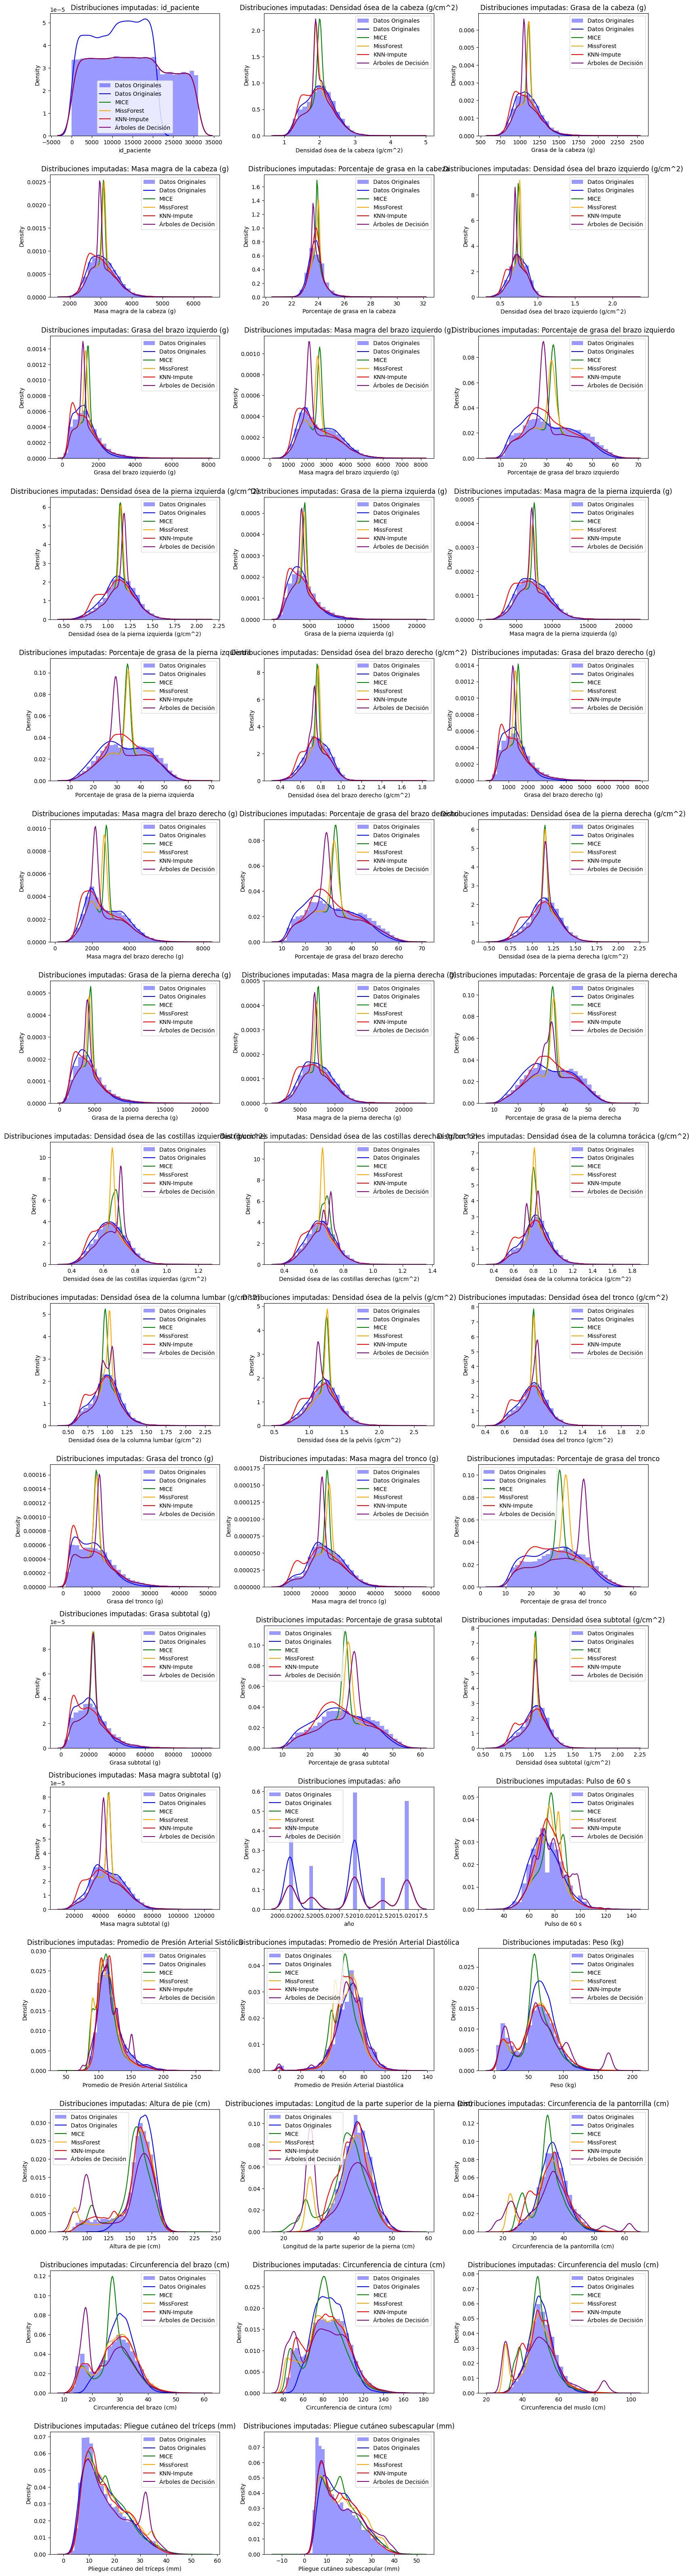

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Número de columnas en la grilla
n_cols = 3
numerical_cols = data_missing.select_dtypes(include=['float64', 'int64']).columns

# Crear grilla de gráficos
n_rows = int(np.ceil(len(numerical_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    # Histograma para los datos originales
    ax.hist(examen[col].dropna(), bins=30, label='Datos Originales', color='blue', alpha=0.4, density=True)

    # Graficar las distribuciones por cada método
    sns.kdeplot(data_complete[col], label='Datos Originales', ax=ax, color='blue')
    sns.kdeplot(mice_imputed[:, i], label='MICE', ax=ax, color='green')
    sns.kdeplot(missforest_imputed[:, i], label='MissForest', ax=ax, color='orange')
    sns.kdeplot(knn_imputed[:, i], label='KNN-Impute', ax=ax, color='red')
    sns.kdeplot(tree_imputed[col], label='Árboles de Decisión', ax=ax, color='purple')

    ax.set_title(f'Distribuciones imputadas: {col}')
    ax.legend()

# Ocultar subplots vacíos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Convertir el resultado a DataFrame con las mismas columnas originales
missforest_imputed_df = pd.DataFrame(missforest_imputed, columns=data_missing.columns, index=data_missing.index)

# Verificar si quedan valores nulos
missforest_imputed_df.isnull().sum()

,0
id_paciente,0
Densidad ósea de la cabeza (g/cm^2),0
Grasa de la cabeza (g),0
Masa magra de la cabeza (g),0
Porcentaje de grasa en la cabeza,0
Densidad ósea del brazo izquierdo (g/cm^2),0
Grasa del brazo izquierdo (g),0
Masa magra del brazo izquierdo (g),0
Porcentaje de grasa del brazo izquierdo,0
Densidad ósea de la pierna izquierda (g/cm^2),0


In [ ]:
# Convertir el resultado a DataFrame con las mismas columnas originales
knn_imputed_df = pd.DataFrame(knn_imputed, columns=data_missing.columns, index=data_missing.index)

knn_imputed_df

,id_paciente,año,Densidad ósea de la cabeza (g/cm^2),Grasa de la cabeza (g),Masa magra de la cabeza (g),Porcentaje de grasa en la cabeza,Densidad ósea del brazo izquierdo (g/cm^2),Grasa del brazo izquierdo (g),Masa magra del brazo izquierdo (g),Porcentaje de grasa del brazo izquierdo,...,Promedio de Presión Arterial Diastólica,Peso (kg),Altura de pie (cm),Longitud de la parte superior de la pierna (cm),Circunferencia de la pantorrilla (cm),Circunferencia del brazo (cm),Circunferencia de cintura (cm),Circunferencia del muslo (cm),Pliegue cutáneo del tríceps (mm),Pliegue cutáneo subescapular (mm)
0,1.0,2002.0,1.5312,913.64,2577.72,23.86,0.5676,530.32,1441.00,26.72,...,56.6,12.50,91.60,37.80,30.88,15.20,45.70,41.00,8.30,5.00
1,2.0,2000.0,2.1840,1158.00,3241.10,23.60,0.8730,1147.90,2740.10,28.10,...,56.0,75.40,174.00,41.44,37.50,29.80,98.00,51.54,12.80,20.40
2,3.0,2002.0,1.7196,1010.52,2810.82,23.98,0.6020,747.28,1728.72,27.80,...,63.0,32.90,136.60,34.10,29.00,19.70,64.70,38.20,8.00,6.50
3,4.0,2002.0,1.7196,1010.52,2810.82,23.98,0.6020,747.28,1728.72,27.80,...,59.6,13.30,120.98,39.38,30.84,16.40,53.72,41.52,10.80,10.20
4,5.0,2000.0,1.9130,1265.90,3520.10,24.20,0.8270,1521.80,3976.80,26.50,...,83.0,92.50,178.30,45.20,42.60,35.80,99.90,56.20,17.40,38.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27410,31119.0,2016.0,1.5190,1207.50,3300.10,24.90,0.7260,1318.00,2967.50,29.70,...,57.6,77.58,169.68,39.72,37.68,32.78,93.72,52.18,14.50,20.62
27411,31121.0,2016.0,1.5620,1048.30,2881.60,24.60,0.5800,1978.50,1749.10,51.80,...,76.2,67.76,159.50,38.52,37.92,31.46,89.36,52.20,27.54,20.54
27412,31123.0,2016.0,2.0964,912.06,2533.46,23.50,0.6622,1769.90,1376.02,54.20,...,67.6,61.90,152.38,36.70,35.66,30.80,91.04,51.62,26.58,20.42
27413,31124.0,2016.0,1.5840,1254.70,3463.40,24.70,0.7780,1521.90,3964.20,26.90,...,77.2,88.14,175.80,41.32,38.82,34.58,101.62,52.24,16.06,24.08


In [ ]:
knn_imputed_df.to_csv('examen.csv', index=False)

from google.colab import files
files.download('examen.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>